___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [36]:
df = pd.read_csv("store_sharing.csv")

In [37]:
type(df['timestamp'][0])

# timestamp feature'unun string tipinde olduğunu gördüm. İlerde bunu datetime tipine çevirmem gerekecek

str

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [39]:
df.sample(10)

timestamp   cnt    t1    t2   hum  wind_speed  weather_code  \
2804   2015-05-01 04:00:00    30   6.5   5.0  78.5         9.0           1.0   
12256  2016-05-31 13:00:00   524  13.0  13.0  82.0        22.0           3.0   
11922  2016-05-17 15:00:00  1560  17.0  17.0  45.0        22.0           3.0   
11313  2016-04-22 06:00:00   591   8.5   5.5  68.5        16.0           1.0   
8675   2016-01-02 08:00:00   171  10.5   9.0  85.0        20.0           3.0   
5058   2015-08-03 09:00:00  2193  21.0  21.0  69.0        24.0           2.0   
12763  2016-06-21 16:00:00  2411  21.0  21.0  53.0        20.5           3.0   
9220   2016-01-25 01:00:00    70  12.0  12.0  88.0         7.0           1.0   
6923   2015-10-20 18:00:00  3490  14.0  14.0  63.0         6.5           2.0   
531    2015-01-26 04:00:00    47   9.0   6.5  87.0        16.0           3.0   

       is_holiday  is_weekend  season  
2804          0.0         0.0     0.0  
12256         0.0         0.0     0.0  
11922         0.0         0.0     0.0  
11313         0.0         0.0     0.0  
8675          0.0         1.0     3.0  
5058          0.0         0.0     1.0  
12763         0.0         0.0     1.0  
9220          0.0         0.0     3.0  
6923          0.0         0.0     2.0  
531           0.0         0.0     3.0

### 3.Check missing values and if there are any dublicate rows or not.

In [40]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [41]:
# düşürmek için drop_duplicates, veriye bakmak için duplicated kullanıyoruz. Datasetimde dublikasyon var mı bakalım.

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

In [42]:
df.duplicated().sum()

0

In [43]:
# aynı satır birden fazla var mı?

df.duplicated().value_counts()

# tüm satırlar False döndürdü. demek ki duplicate yok

False    17414
dtype: int64

In [44]:
df.isna().sum()

# elimdeki verilerde hiç boş veri olmadığını gördüm. dolayısıla dropna ile bunları düşürmeme gerek yok

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

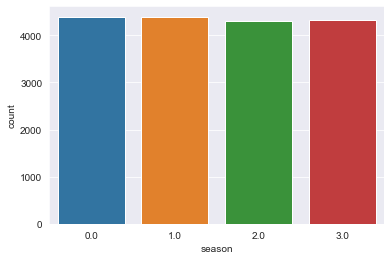

In [45]:
# season

sns.countplot("season", data=df)

# bunlar seoson'lara göre kayıt sayısını gösteriyor.

In [46]:
# season


<AxesSubplot:xlabel='is_holiday', ylabel='count'>

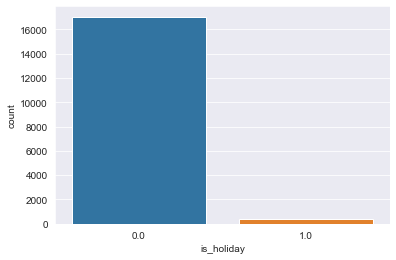

In [47]:
# is_holiday

sns.countplot("is_holiday", data=df)

# bunlar tatil günleri olup olmaması durumlarına göre kayıt sayısını gösteriyor.

In [48]:
# is_holiday


<AxesSubplot:xlabel='is_weekend', ylabel='count'>

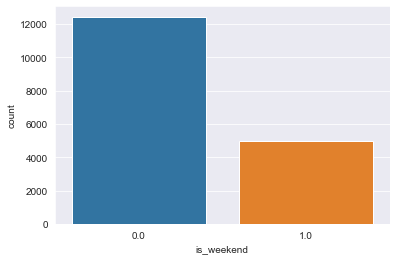

In [49]:
sns.countplot("is_weekend", data=df)

# hafta sonu olup olmama durumuna göre kayıt sayısını gösteriyor.

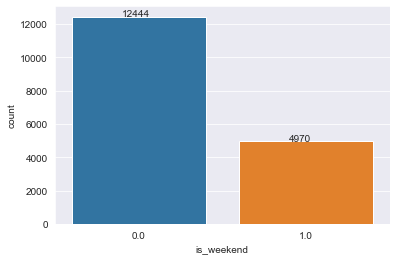

In [50]:
# annotate kullanarak değerleri barların üzerine yazdıralım.

ax = sns.countplot("is_weekend", data=df);  # bu plotu bir axes'e atadık ki onun patch'ini alıp for döngüsüne sokabilelim.

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+20));
    

In [51]:
# is_weekend


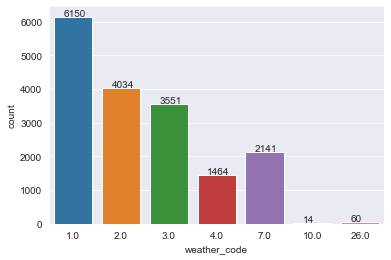

In [52]:
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x()+0.2, p.get_height()+20)    );


In [53]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [54]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [55]:
df.timestamp = pd.to_datetime(df.timestamp)

# timestamp kolonunun kendi içinde dolaşacak ve her birini datetime'a çevirecek. (datetime'a çevirerek yine kendine atadık.)

In [56]:
df.set_index("timestamp", inplace=True)
df.head()

# timestamp sütununu index yaptım.

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [57]:
df['year'] = df.index.year

# index'in year kısımlarını alıp year isminde bir sütun oluşturdum.

In [58]:
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour

df["year-month"]  = df.index.strftime("%Y-%m") 

In [59]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0  2015      1   

                     day_of_month  day_of_week  hour year-month  
timestamp                                                        
2015-01-04 00:00:00             4            6     0    2015-01  
2015-01-04 01:00:00             4            6     1    2015-01  
2015-01-04 02:00:00             4            6     2    2015-01  
2015-01-04 03:00:00             4            6     3    2015-01  
2015-01-04 04:00:00             4            6     4    2015-01

In [60]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0  2015      1   

                     day_of_month  day_of_week  hour year-month  
timestamp                                                        
2015-01-04 00:00:00             4            6     0    2015-01  
2015-01-04 01:00:00             4            6     1    2015-01  
2015-01-04 02:00:00             4            6     2    2015-01  
2015-01-04 03:00:00             4            6     3    2015-01  
2015-01-04 04:00:00             4            6     4    2015-01

### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

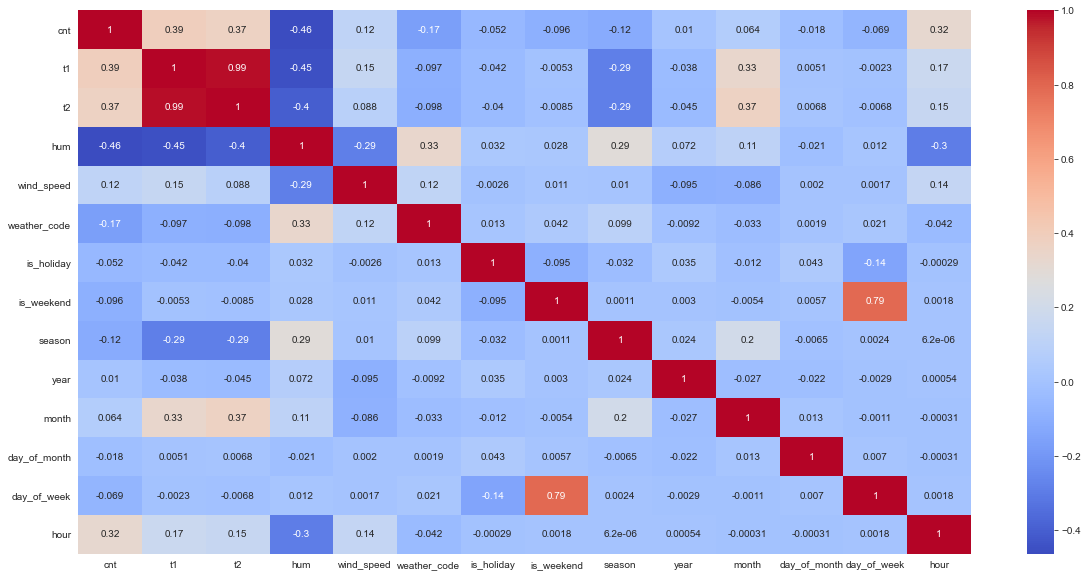

In [61]:
# for all variables 

plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [62]:
# for all variables 


<AxesSubplot:>

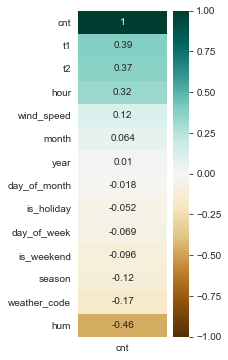

In [63]:
# for the target variable

plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), cmap="BrBG", 
            annot=True, vmin=-1, vmax=1)

# corr değerlerini küçükten büyüğe sıraladık

In [64]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [65]:
df.corr()[["cnt"]].sort_values(by="cnt", ascending=True)

cnt
hum          -0.462901
weather_code -0.166633
season       -0.116180
is_weekend   -0.096499
day_of_week  -0.068688
is_holiday   -0.051698
day_of_month -0.017887
year          0.010046
month         0.063757
wind_speed    0.116295
hour          0.324423
t2            0.369035
t1            0.388798
cnt           1.000000

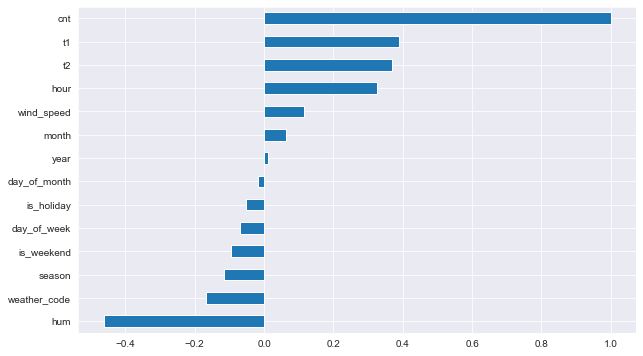

In [66]:
#with pandas

plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()
plt.show()

In [67]:
#with pandas


### 9.Plot bike shares over time use lineplot

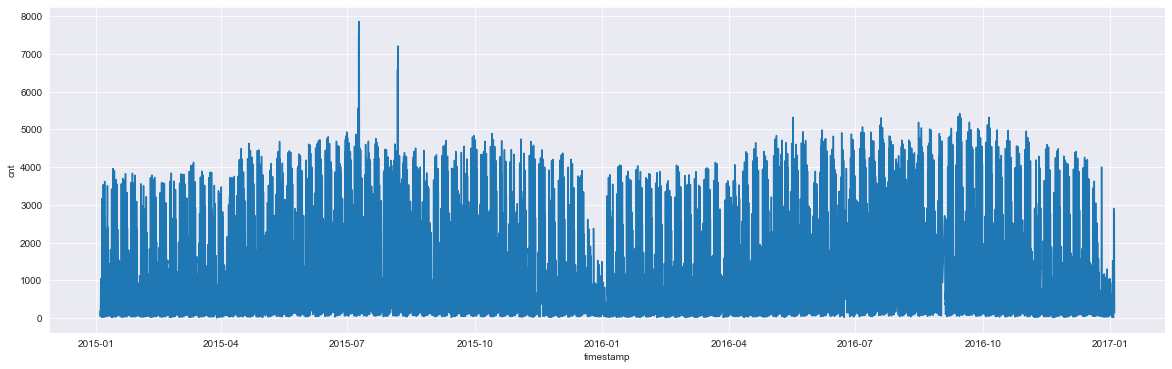

In [68]:
plt.figure(figsize=(20,6))

sns.lineplot(x=df.index, y="cnt", data=df);


### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [69]:
df.head(1)

cnt   t1   t2   hum  wind_speed  weather_code  is_holiday  \
timestamp                                                               
2015-01-04  182  3.0  2.0  93.0         6.0           3.0         0.0   

            is_weekend  season  year  month  day_of_month  day_of_week  hour  \
timestamp                                                                      
2015-01-04         1.0     3.0  2015      1             4            6     0   

           year-month  
timestamp              
2015-01-04    2015-01

In [70]:
df

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0  2015      1   
...                         ...         ...     ...   ...    ...   
2017-01-03 19:00:00         0.0         0.0     3.0  2017      1   
2017-01-03 20:00:00         0.0         0.0     3.0  2017      1   
2017-01-03 21:00:00         0.0         0.0     3.0  2017      1   
2017-01-03 22:00:00         0.0         0.0     3.0  2017      1   
2017-01-03 23:00:00         0.0         0.0     3.0  2017      1   

                     day_of_month  day_of_week  hour year-month  
timestamp                                                        
2015-01-04 00:00:00             4            6     0    2015-01  
2015-01-04 01:00:00             4            6     1    2015-01  
2015-01-04 02:00:00             4            6     2    2015-01  
2015-01-04 03:00:00             4            6     3    2015-01  
2015-01-04 04:00:00             4            6     4    2015-01  
...                           ...          ...   ...        ...  
2017-01-03 19:00:00             3            1    19    2017-01  
2017-01-03 20:00:00             3            1    20    2017-01  
2017-01-03 21:00:00             3            1    21    2017-01  
2017-01-03 22:00:00             3            1    22    2017-01  
2017-01-03 23:00:00             3            1    23    2017-01  

[17414 rows x 15 columns]

In [71]:
# önce aylara göre cnt sayılarının toplamını göreyim

df.groupby("year-month").cnt.sum()


year-month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [72]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())

# yukardaki bilgilerden oluşan yeni bir df_sum dataframe oluşturdum.

In [73]:
df_sum

cnt
year-month         
2015-01      546639
2015-02      543594
2015-03      695934
2015-04      831582
2015-05      895413
2015-06     1033252
2015-07     1120687
2015-08     1033951
2015-09      892478
2015-10      865046
2015-11      677332
2015-12      602838
2016-01      582518
2016-02      592910
2016-03      656527
2016-04      768845
2016-05     1001935
2016-06      933878
2016-07     1165527
2016-08     1137314
2016-09      998619
2016-10      935706
2016-11      703859
2016-12      651908
2017-01       37680

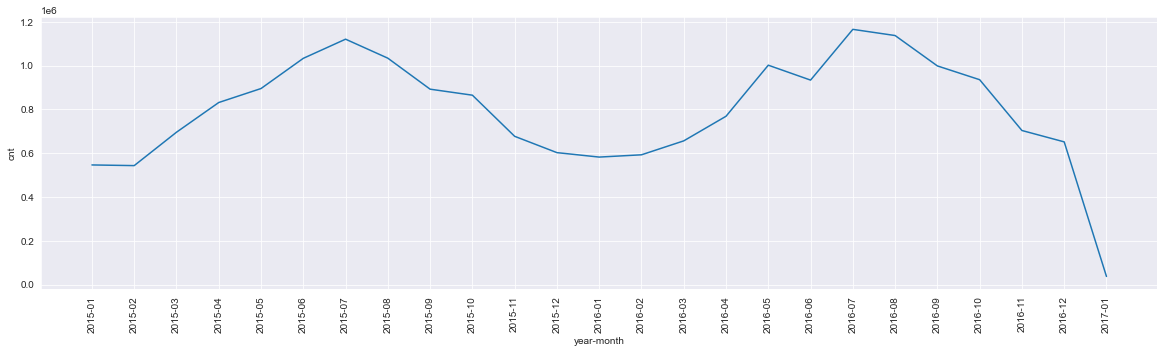

In [115]:
# with lineplot

plt.figure(figsize=(20,5))

sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);


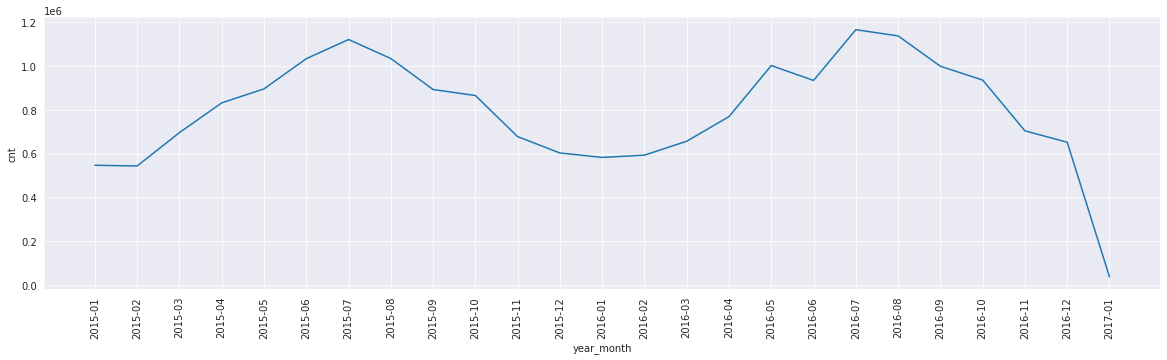

In [ ]:
# with lineplot


<AxesSubplot:xlabel='month', ylabel='cnt'>

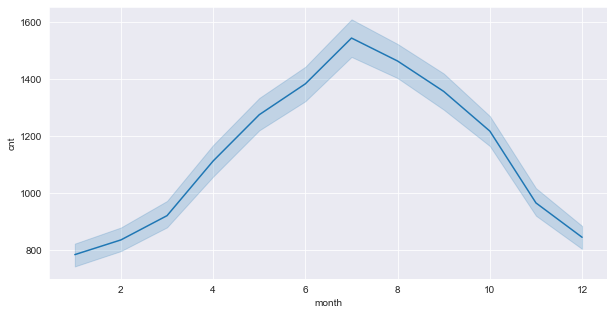

In [116]:
# with lineplot

plt.figure(figsize=(10,5))
sns.lineplot(x = "month", y = "cnt", data=df)

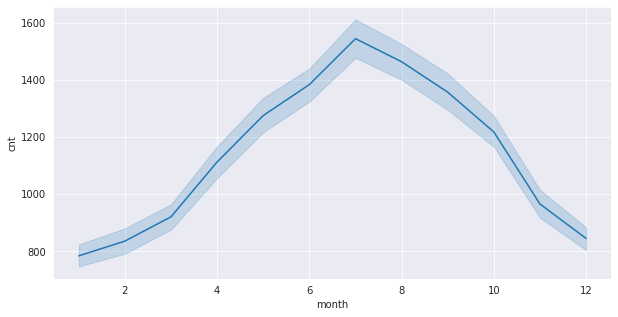

In [ ]:
# with lineplot


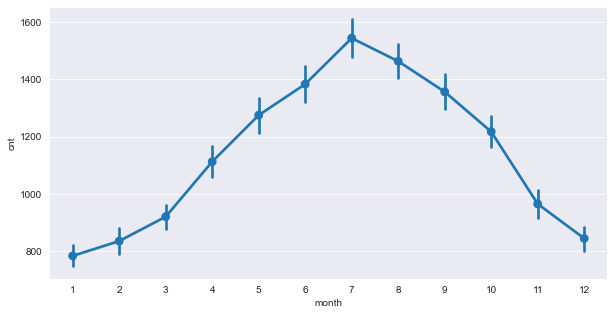

In [118]:
# with pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x = "month", y = "cnt", data=df);


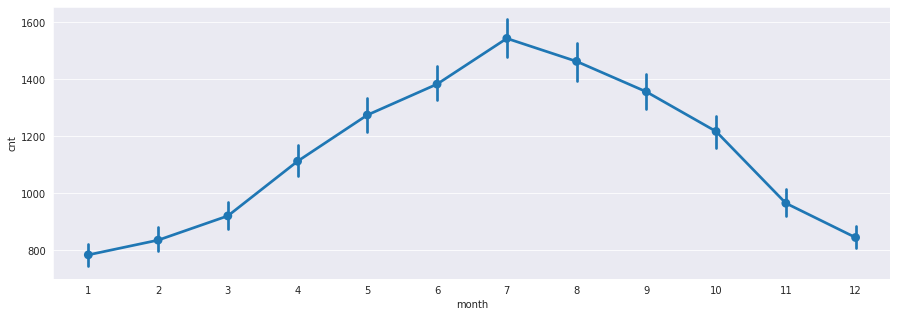

In [ ]:
# with pointplot


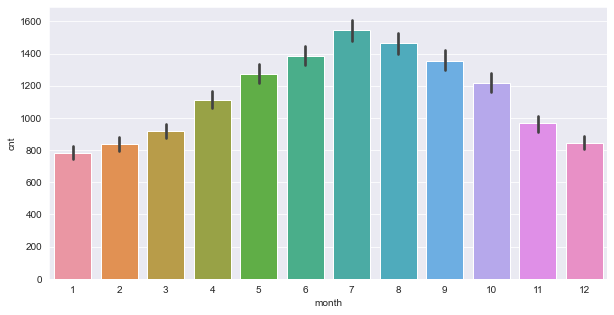

In [119]:
# with barplot

plt.figure(figsize=(10,5))
sns.barplot(x = "month", y = "cnt", data=df, ci=95);

# güven aralığı 95 olarak kabul görmüştür. ben de 95 girdim

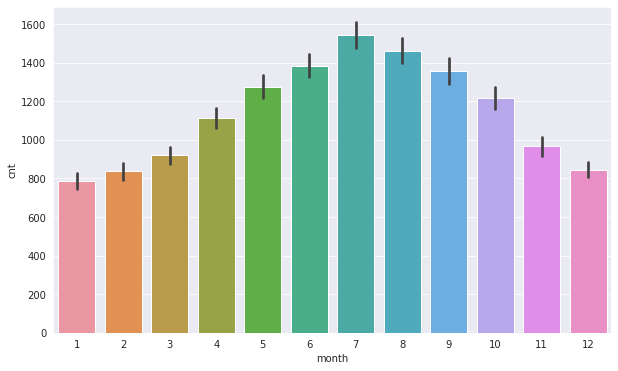

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

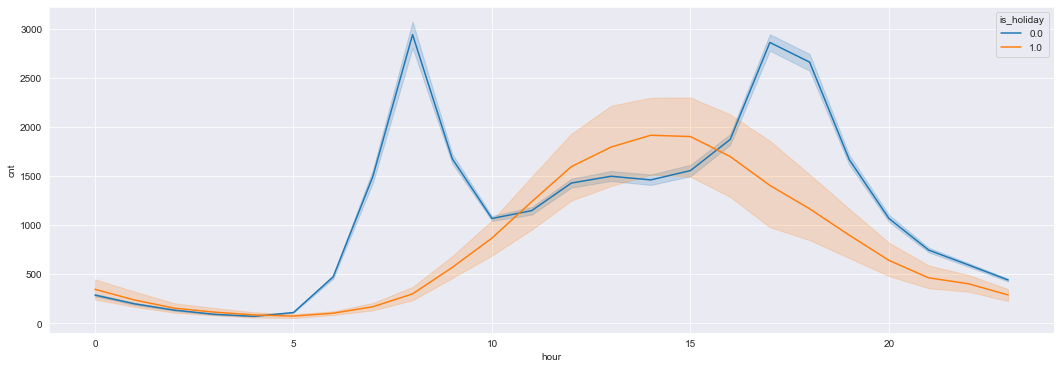

In [172]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(18,6))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "is_holiday");

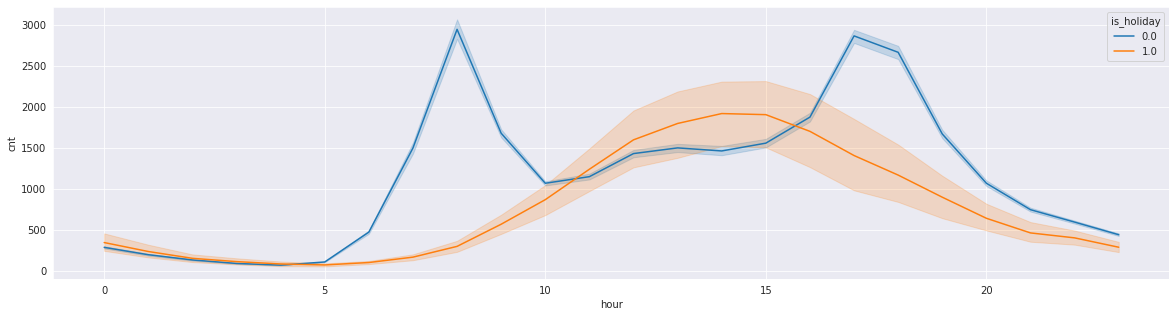

In [ ]:
# with lineplot (*whether it is a holiday or not*)


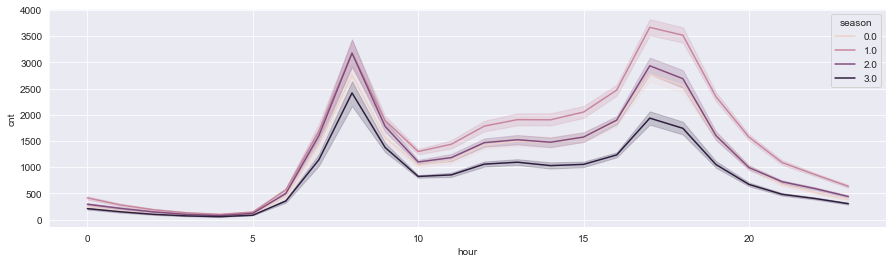

In [121]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "season");

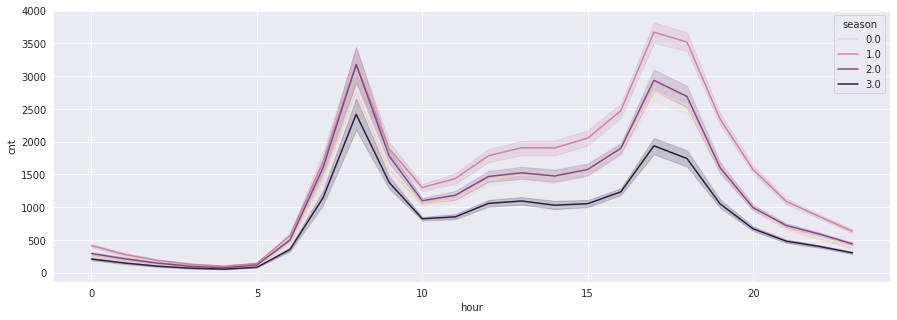

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


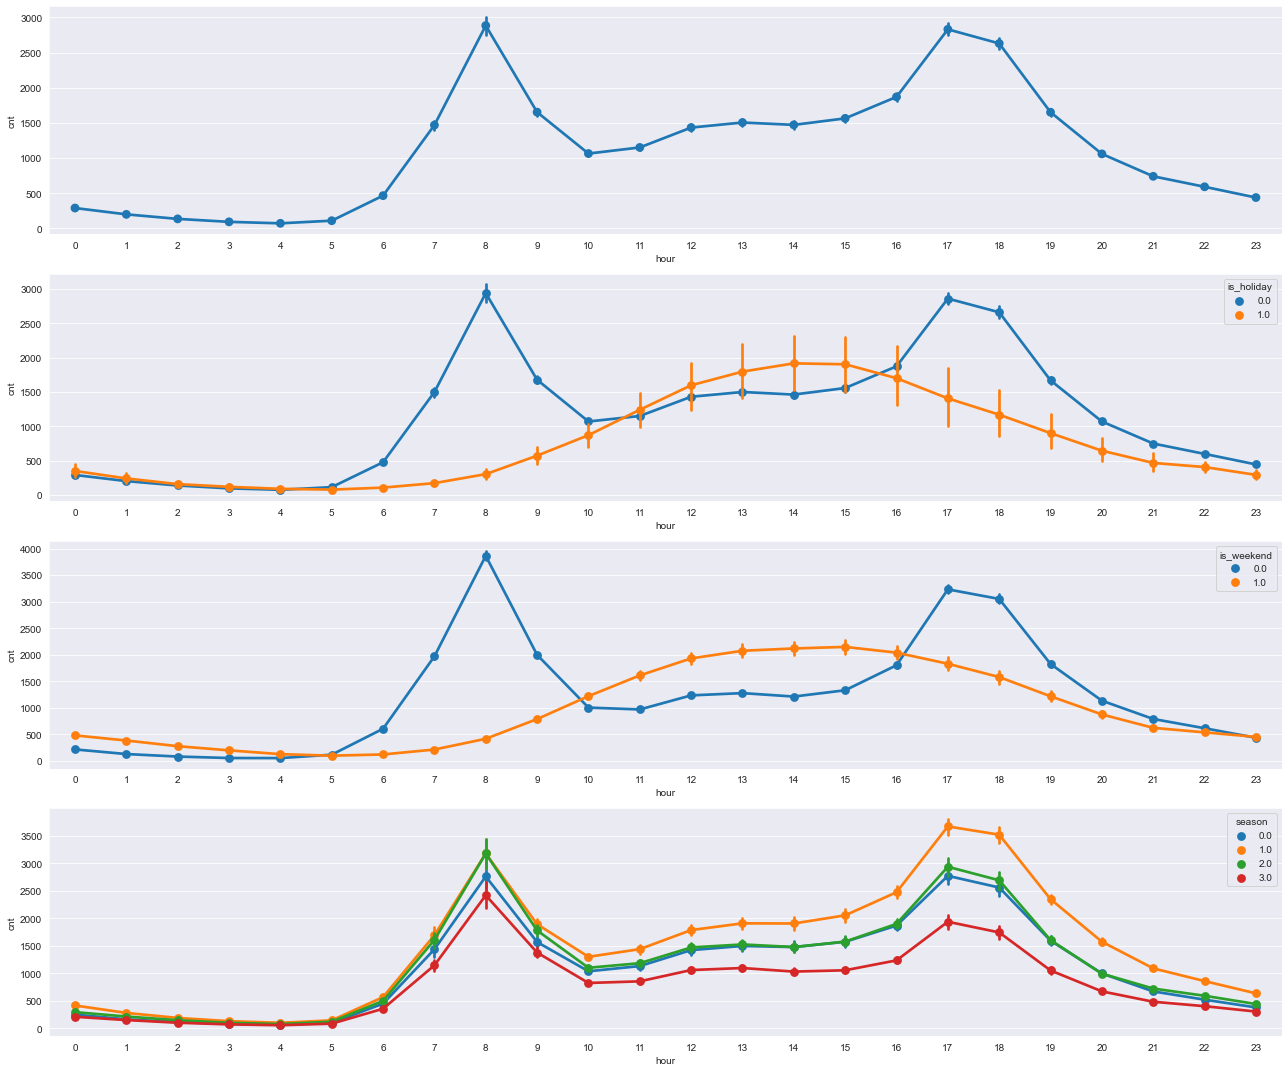

In [78]:
fig, ax = plt.subplots(nrows = 4, figsize = (18,15)) # nrows ve ncols default olarak 1 olduğundan ncols değeri girilmedi.

sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[0])
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[1],
             hue = "is_holiday")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[2],
             hue = "is_weekend")
sns.pointplot(data = df, x = "hour", y = "cnt", ax = ax[3],
             hue = "season")
plt.tight_layout()

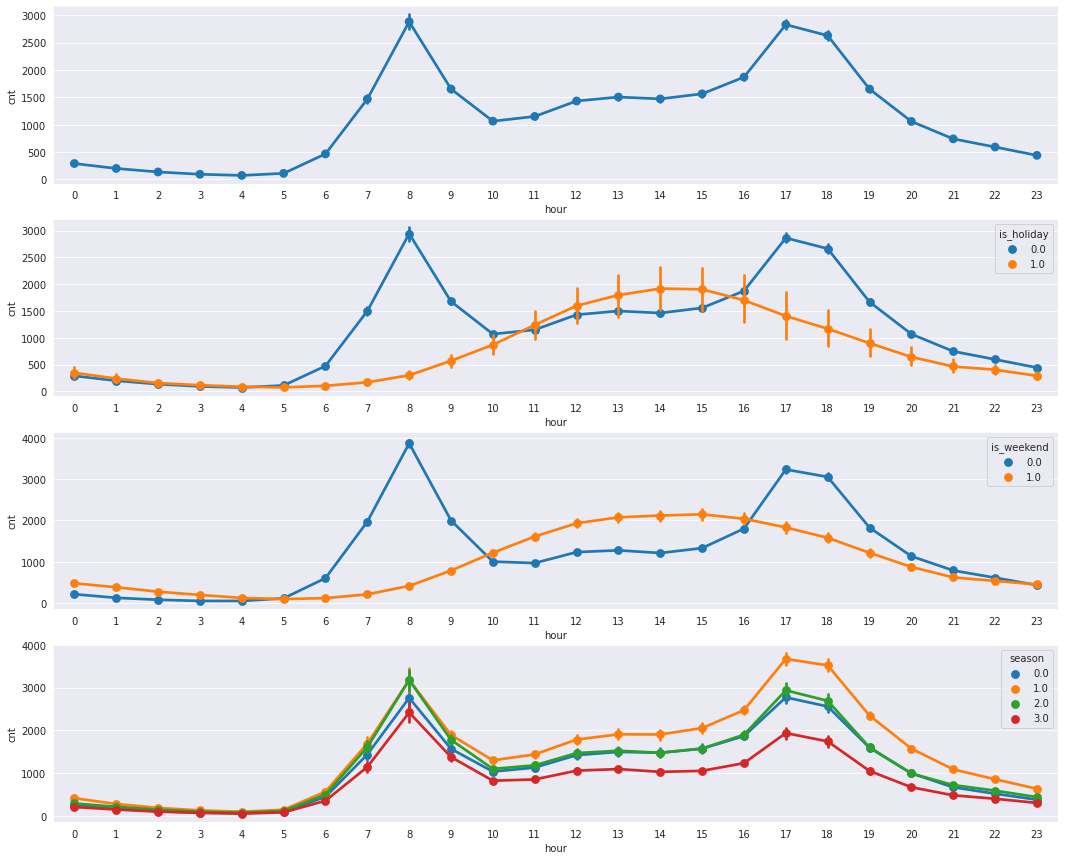

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

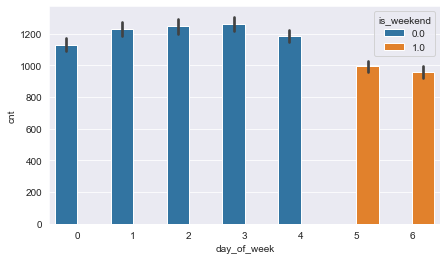

In [180]:
# with barplot

plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue = "is_weekend")


In [ ]:
# with barplot


<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

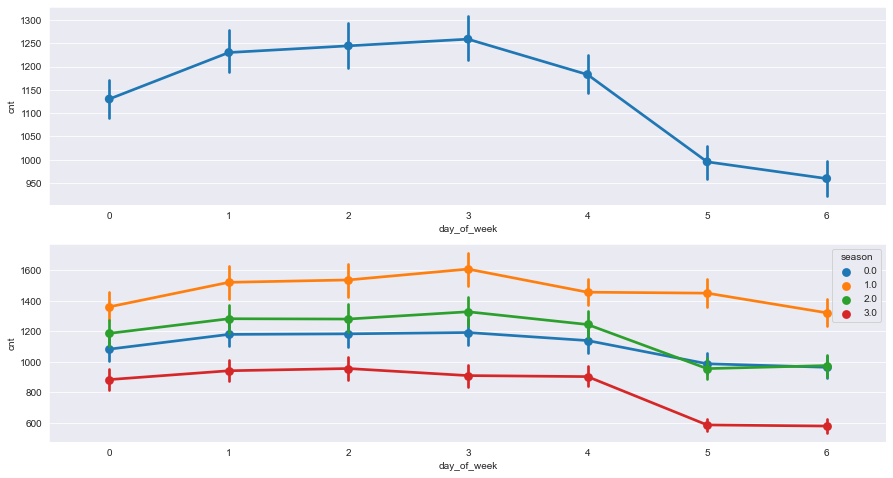

In [187]:
# with pointplot

fig, ax = plt.subplots(2,1, figsize=(15,8))

sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data=df, x="day_of_week", y = "cnt", ax = ax[1], hue = "season")

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

In [188]:
# önce day_of_month a göre gruplayacağım. sonra cnt'sinin ortalamasını alacağım

df.groupby("day_of_month").cnt.mean()

day_of_month
1     1077.455652
2     1088.117754
3     1127.602837
4     1144.492174
5     1140.772727
6     1211.227431
7     1194.151832
8     1222.696491
9     1261.260870
10    1157.453913
11    1203.618467
12    1166.952212
13    1139.221441
14    1123.670139
15    1175.629565
16    1140.871080
17    1182.311847
18    1178.552632
19    1153.147826
20    1115.667832
21    1125.729167
22    1127.717014
23    1173.994792
24    1054.147950
25    1190.786087
26    1081.516637
27    1130.681979
28    1062.750871
29    1079.680581
30    1156.406844
31     968.187311
Name: cnt, dtype: float64

In [80]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T


day_of_month    1     2     3     4     5     6     7     8     9     10  ...  \
cnt           1077  1088  1127  1144  1140  1211  1194  1222  1261  1157  ...   

day_of_month    22    23    24    25    26    27    28    29    30   31  
cnt           1127  1173  1054  1190  1081  1130  1062  1079  1156  968  

[1 rows x 31 columns]

day_of_month    1     2     3     4     5     6     7     8     9     10  ...  \
cnt           1077  1088  1127  1144  1140  1211  1194  1222  1261  1157  ...   

day_of_month    22    23    24    25    26    27    28    29    30   31  
cnt           1127  1173  1054  1190  1081  1130  1062  1079  1156  968  

[1 rows x 31 columns]

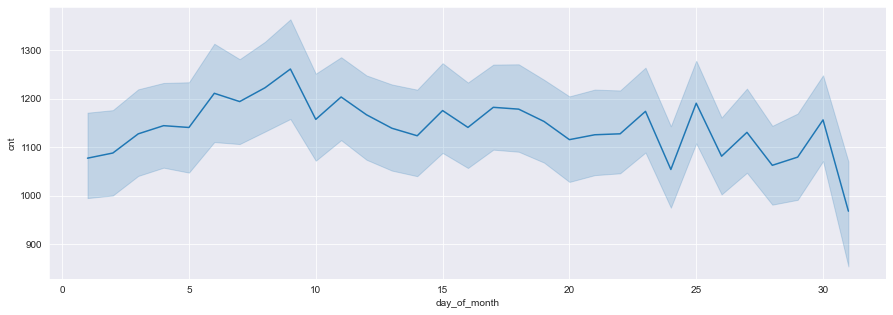

In [139]:
#with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

In [ ]:
#with lineplot



day_of_month    1     2     3     4     5   ...    27    28    29    30   31
cnt           1077  1088  1128  1144  1141  ...  1131  1063  1080  1156  968

[1 rows x 31 columns]

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot:xlabel='year', ylabel='cnt'>

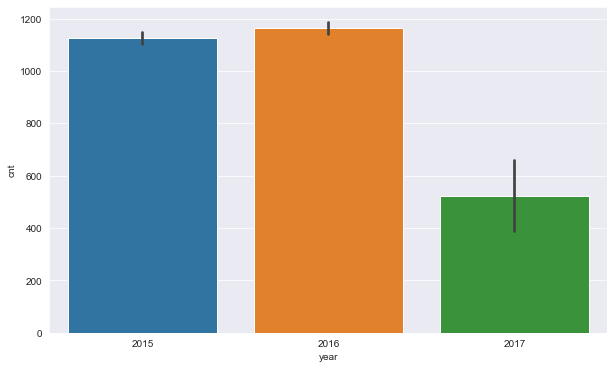

In [138]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt")

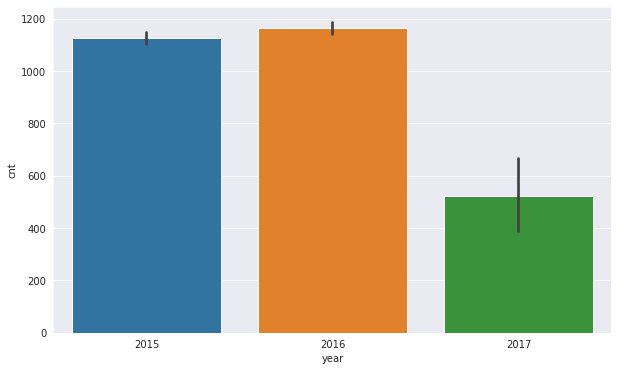

In [11]:
# with barplot


In [84]:
df [df["is_holiday"]==1]

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-04-03 00:00:00  279  8.0  6.0  82.0        10.0           7.0   
2015-04-03 01:00:00  174  8.0  5.5  79.0        14.0           7.0   
2015-04-03 02:00:00   89  7.5  5.5  84.5        12.0           7.0   
2015-04-03 03:00:00   61  7.0  5.0  87.0        11.0           7.0   
2015-04-03 04:00:00   46  7.0  6.0  93.0         6.0           7.0   
...                  ...  ...  ...   ...         ...           ...   
2017-01-02 19:00:00  433  3.0  0.0  81.0        11.0           1.0   
2017-01-02 20:00:00  334  3.0  0.0  75.0        13.0           1.0   
2017-01-02 21:00:00  233  2.5 -0.5  78.0        11.0           1.0   
2017-01-02 22:00:00  201  2.0 -1.0  81.0        10.0           1.0   
2017-01-02 23:00:00  145  1.0 -2.0  93.0        10.0           1.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-04-03 00:00:00         1.0         0.0     0.0  2015      4   
2015-04-03 01:00:00         1.0         0.0     0.0  2015      4   
2015-04-03 02:00:00         1.0         0.0     0.0  2015      4   
2015-04-03 03:00:00         1.0         0.0     0.0  2015      4   
2015-04-03 04:00:00         1.0         0.0     0.0  2015      4   
...                         ...         ...     ...   ...    ...   
2017-01-02 19:00:00         1.0         0.0     3.0  2017      1   
2017-01-02 20:00:00         1.0         0.0     3.0  2017      1   
2017-01-02 21:00:00         1.0         0.0     3.0  2017      1   
2017-01-02 22:00:00         1.0         0.0     3.0  2017      1   
2017-01-02 23:00:00         1.0         0.0     3.0  2017      1   

                     day_of_month  day_of_week  hour year-month  
timestamp                                                        
2015-04-03 00:00:00             3            4     0    2015-04  
2015-04-03 01:00:00             3            4     1    2015-04  
2015-04-03 02:00:00             3            4     2    2015-04  
2015-04-03 03:00:00             3            4     3    2015-04  
2015-04-03 04:00:00             3            4     4    2015-04  
...                           ...          ...   ...        ...  
2017-01-02 19:00:00             2            0    19    2017-01  
2017-01-02 20:00:00             2            0    20    2017-01  
2017-01-02 21:00:00             2            0    21    2017-01  
2017-01-02 22:00:00             2            0    22    2017-01  
2017-01-02 23:00:00             2            0    23    2017-01  

[384 rows x 15 columns]

In [193]:
# with barplot

# benden tatil günlerinin verileri içerisinde mevsimlere göre cnt sayılarının grafiğini istiyor.
# önce tatil günlerinin True olduğu durumları dataframe'den çekerim ve çizdireceğim barplotta bu datayı kullanırım.

plt.figure(figsize=(10,6))

sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt")

<AxesSubplot:xlabel='season', ylabel='cnt'>

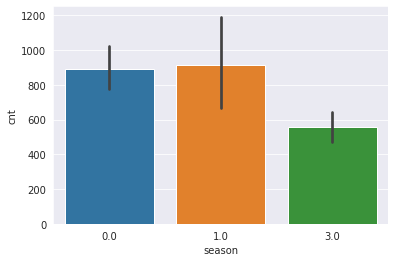

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [189]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

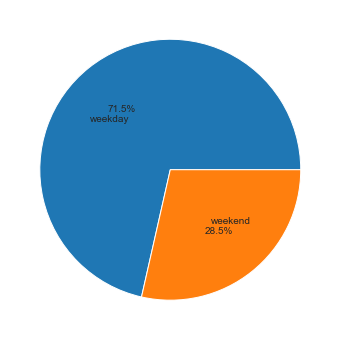

In [86]:
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(df.is_weekend.value_counts(), labels=["weekday","weekend"],
       labeldistance=0.5, autopct="%.1f%%");

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

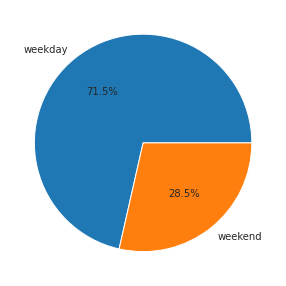

In [ ]:
# pie chart

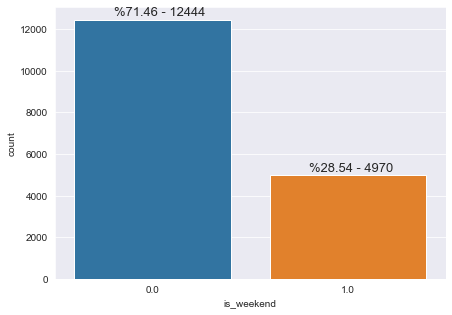

In [190]:
# with countplot

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)

for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
    
plt.show()

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

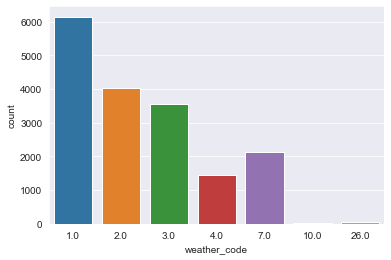

In [147]:
# with countplot

sns.countplot(x="weather_code", data=df)

In [ ]:
# with countplot


In [149]:
# with catplot

sns.catplot(x = "weather_code", data = df, col = "season", kind = "count");


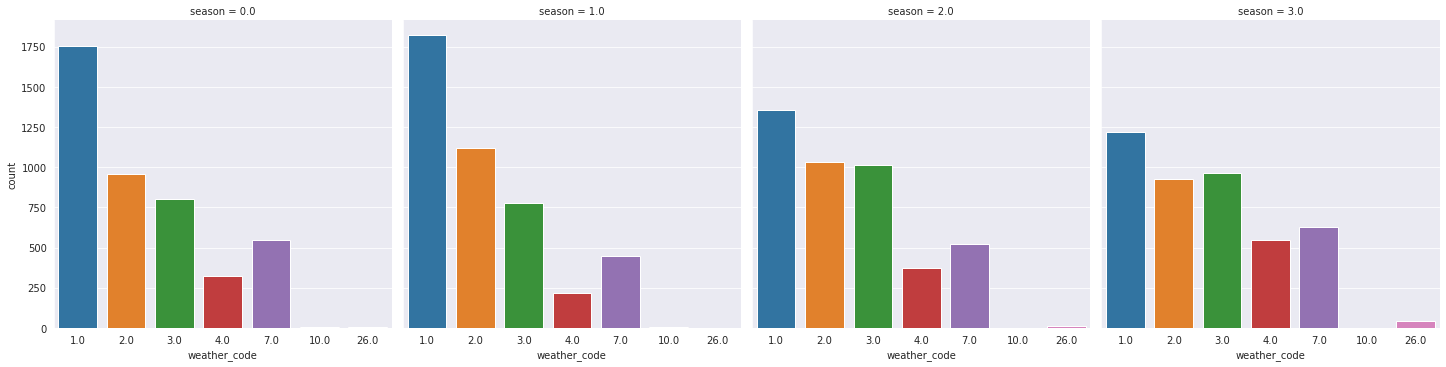

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

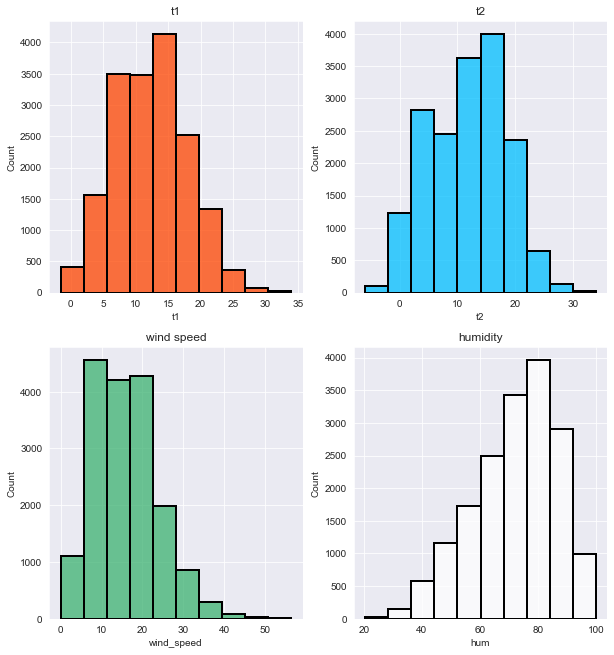

In [191]:
# matplotlip hist

fig , ax = plt.subplots(2,2,figsize=(10,11))

sns.histplot(data=df, x="t1", bins=10, color="orangered", edgecolor = "black", lw = 2, ax=ax[0,0]).set_title("t1")

sns.histplot(data=df, x="t2", bins=10, color="deepskyblue", edgecolor = "black", lw = 2, ax=ax[0,1]).set_title("t2")

sns.histplot(data=df, x="wind_speed", bins=10, color="mediumseagreen", edgecolor = "black", lw = 2, ax=ax[1,0]).set_title("wind speed")

sns.histplot(data=df, x="hum", bins=10, color="white", edgecolor = "black", lw = 2, ax=ax[1,1]).set_title("humidity")

plt.show()

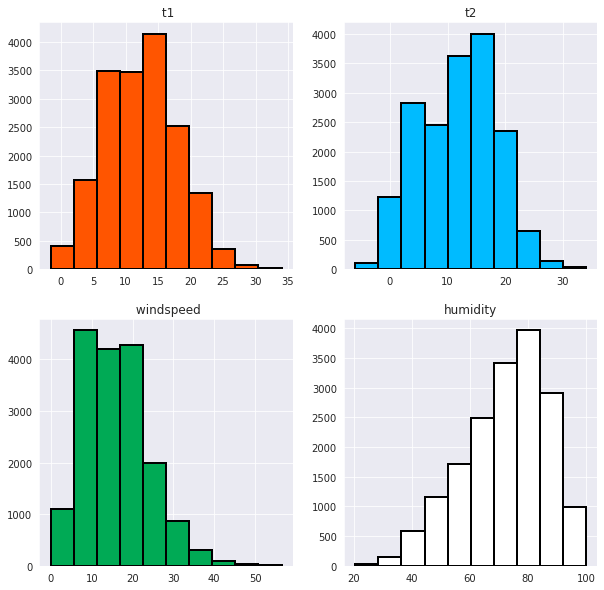

In [ ]:
# matplotlip hist


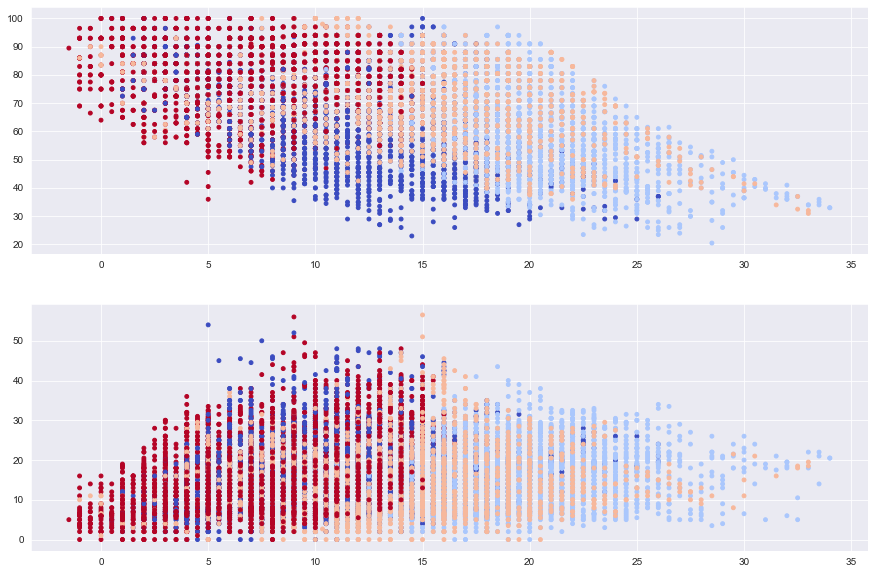

In [92]:
# matplotlib scatterplot

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);

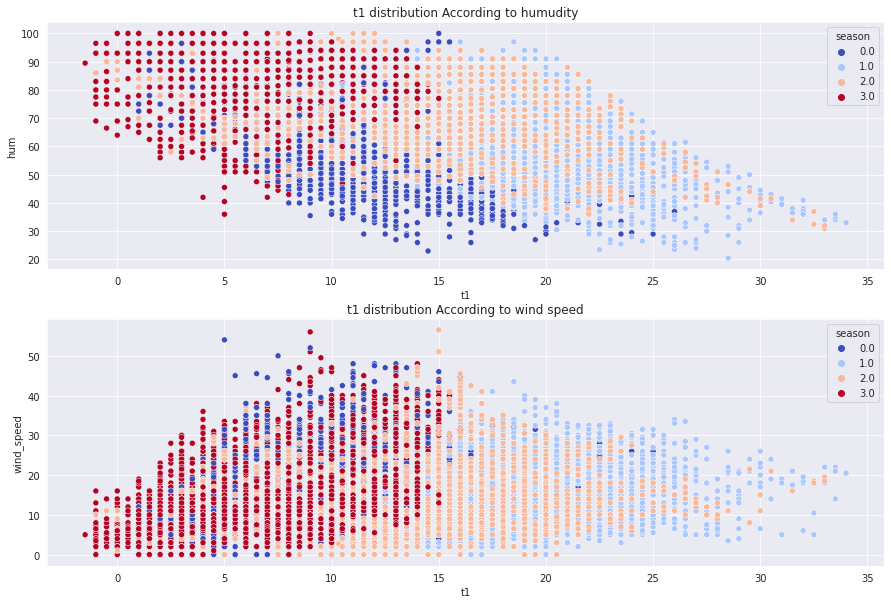

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___